In [1]:
from PIL import Image
import glob
import os

print('PIL 라이브러리 임포트 완료')

PIL 라이브러리 임포트 완료


In [3]:
def resize_images(img_path):
    images = glob.glob(img_path + '/*.jpg')
    
    print(len(images), 'images to be resized')
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, 'JPEG')
        
    print(len(images), 'images resized.')
    
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/scissor'
resize_images(image_dir_path)

print('가위 이미지 resize 완료')

66 images to be resized
66 images resized.
가위 이미지 resize 완료


In [12]:
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/rock'
resize_images(image_dir_path)

70 images to be resized
70 images resized.


In [13]:
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/paper'
resize_images(image_dir_path)

70 images to be resized
70 images resized.


In [77]:
import numpy as np

def load_data(img_path, number_of_data=3000):
    #가위0 바위1 보2
    img_size=28
    color=3
    #이미지 데이터와 라벨데이터를 담을 행렬 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.*g'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.*g'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=1
        idx=idx+1
    
    for file in glob.iglob(img_path+'/paper/*.*g'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=2
        idx=idx+1
    
    print('학습데이터의 이미지 개수는', idx,'입니다.')
    return imgs, labels

image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0 #입력은 0~1사이의 값으로 정규화

print('x_train shape {}'.format(x_train.shape))
print('y_train shape {}'.format(y_train.shape))

        

학습데이터의 이미지 개수는 2394 입니다.
x_train shape (3000, 28, 28, 3)
y_train shape (3000,)


라벨: 0


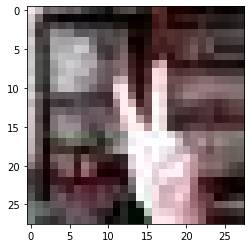

In [23]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨:', y_train[0])

딥러닝 네트워크 설계하기

In [61]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=8

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))

model.add(keras.layers.MaxPool2D(2,2))#풀링 층

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))

model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(n_dense, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [62]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/8
10/10 [==============================] - 1s 16ms/step - loss: 15.6736 - accuracy: 0.5700
Epoch 2/8
10/10 [==============================] - 0s 16ms/step - loss: 2.2469 - accuracy: 0.7533
Epoch 3/8
10/10 [==============================] - 0s 17ms/step - loss: 1.0170 - accuracy: 0.8700
Epoch 4/8
10/10 [==============================] - 0s 19ms/step - loss: 0.6787 - accuracy: 0.9767
Epoch 5/8
10/10 [==============================] - 0s 20ms/step - loss: 0.6060 - accuracy: 0.9900
Epoch 6/8
10/10 [==============================] - 0s 20ms/step - loss: 0.5105 - accuracy: 1.0000
Epoch 7/8
10/10 [==============================] - 0s 19ms/step - loss: 0.3938 - accuracy: 1.0000
Epoch 8/8
10/10 [==============================] - 0s 19ms/step - loss: 0.2527 - accuracy: 1.0000


테스트 데이터 불러오기(웹캠 없는사람용 3년전 데이터 가져옴)

In [32]:
testrock_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/test/test/rock'
testscissor_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/test/test/scissor'
testpaper_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/test/test/paper'

resize_images(testrock_dir_path)
resize_images(testscissor_dir_path)
resize_images(testpaper_dir_path)

100 images to be resized
100 images resized.
100 images to be resized
100 images resized.
100 images to be resized
100 images resized.


In [53]:
testimg_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/test/test'

(x_test, y_test)=load_data(testimg_dir_path)

x_test_norm = x_test/255.0
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


test_accuracy 측정

In [65]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

10/10 - 0s - loss: 9.7616 - accuracy: 0.3333
test_loss: 9.76156997680664
test_accuracy: 0.3333333432674408


# 모델 수정해보기

In [71]:
#일단 학습데이터 늘려보기, 캐글에서 받은 png파일 변환하기
def resize_pngimages(img_path):
    images = glob.glob(img_path + '/*.png')
    
    print(len(images), 'images to be resized')
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, 'JPEG')
        
    print(len(images), 'images resized.')
    
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/scissor'
resize_pngimages(image_dir_path)
print('가위 이미지 resize 완료')

image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/rock'
resize_pngimages(image_dir_path)
print('바위 이미지 resize 완료')

image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/paper'
resize_pngimages(image_dir_path)
print('보 이미지 resize 완료')

750 images to be resized
750 images resized.
가위 이미지 resize 완료
726 images to be resized
726 images resized.
바위 이미지 resize 완료
712 images to be resized
712 images resized.
보 이미지 resize 완료


In [78]:
image_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0

print('x_train shape {}'.format(x_train.shape))
print('y_train shape {}'.format(y_train.shape))

학습데이터의 이미지 개수는 2394 입니다.
x_train shape (3000, 28, 28, 3)
y_train shape (3000,)


In [105]:
n_channel_1=8
n_channel_2=16
n_dense=32
n_train_epoch=3 #하이퍼파라미터 조정

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/3
94/94 [==============================] - 2s 19ms/step - loss: 0.0114 - accuracy: 0.9973
Epoch 2/3
94/94 [==============================] - 2s 19ms/step - loss: 0.0333 - accuracy: 0.9923
Epoch 3/3
94/94 [==============================] - 2s 19ms/step - loss: 0.0076 - accuracy: 0.9980


In [108]:
testimg_dir_path = os.getenv('HOME') + '/aiffel/rock_scissor_paper/test/test'
(x_test, y_test)=load_data(testimg_dir_path)
x_test_norm = x_test/255.0
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터의 이미지 개수는 300 입니다.
x_test shape: (3000, 28, 28, 3)
y_test shape: (3000,)


In [109]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

94/94 - 1s - loss: 0.6097 - accuracy: 0.9390
test_loss: 0.6097202301025391
test_accuracy: 0.9390000104904175


그냥 좋은 데이터를 많이 넣으니까 성능이 좋아졌다.